## GOAL: Create a model to predict whether or not a customer will Churn .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration



In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

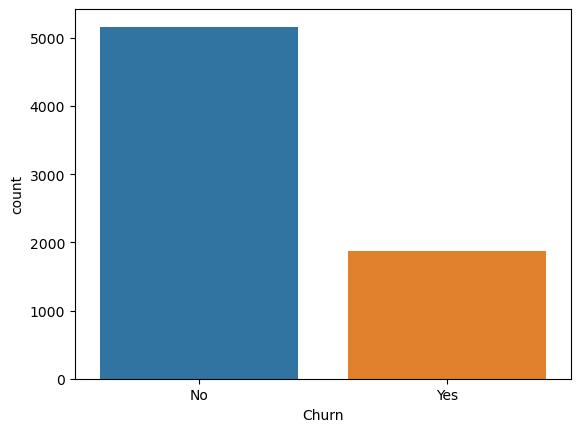

In [8]:
sns.countplot(x='Churn',data=df)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

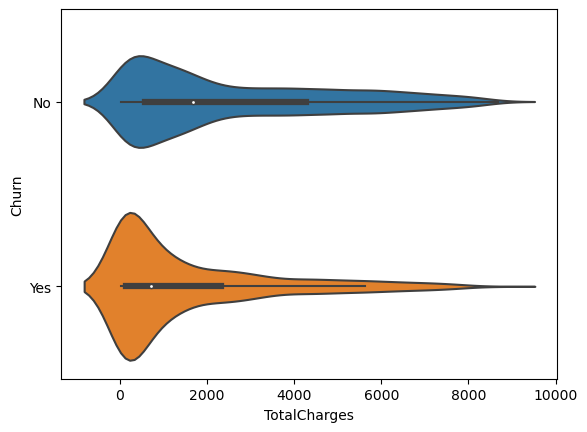

In [10]:
sns.violinplot(x='TotalCharges',y='Churn',data=df)

<Axes: xlabel='TotalCharges', ylabel='Contract'>

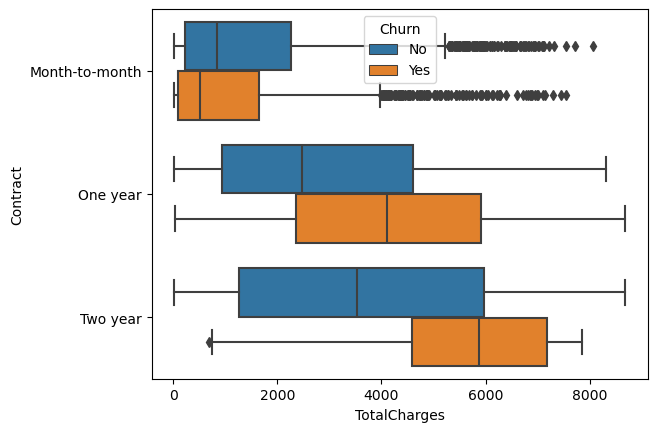

In [47]:
sns.boxplot(data=df,x='TotalCharges',y='Contract',hue='Churn')

In [12]:
corr=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],drop_first=True).corr()

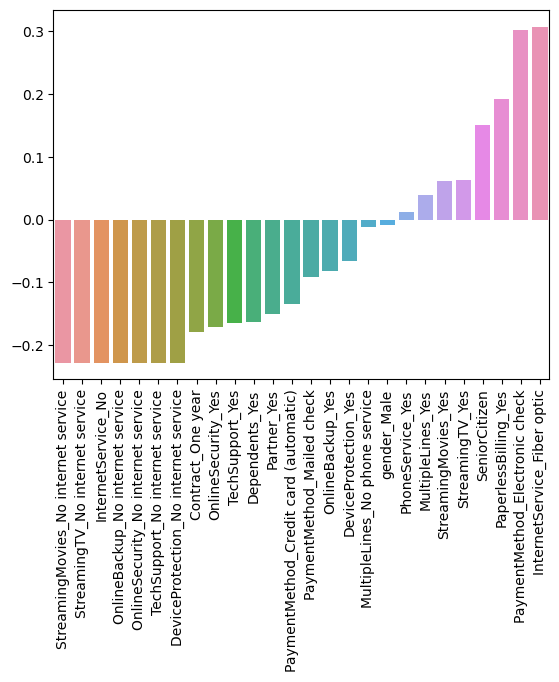

In [13]:
abc=corr['Churn_Yes'].sort_values().iloc[1:-1]
sns.barplot(data=df,x=abc.index,y=abc.values)
plt.xticks(rotation=90);

In [14]:
corr.corr()['Churn_Yes'][:-1].sort_values(ascending=False)

PaymentMethod_Electronic check           0.716373
InternetService_Fiber optic              0.664889
PaperlessBilling_Yes                     0.592563
SeniorCitizen                            0.527401
StreamingTV_Yes                          0.376897
StreamingMovies_Yes                      0.373149
MultipleLines_Yes                        0.319036
DeviceProtection_Yes                     0.186638
OnlineBackup_Yes                         0.182579
MultipleLines_No phone service           0.022611
gender_Male                              0.003141
TechSupport_Yes                         -0.007553
PhoneService_Yes                        -0.022611
OnlineSecurity_Yes                      -0.023579
Contract_One year                       -0.295598
Partner_Yes                             -0.296814
PaymentMethod_Credit card (automatic)   -0.306576
PaymentMethod_Mailed check              -0.422765
Dependents_Yes                          -0.505381
StreamingTV_No internet service         -0.520922


# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [48]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

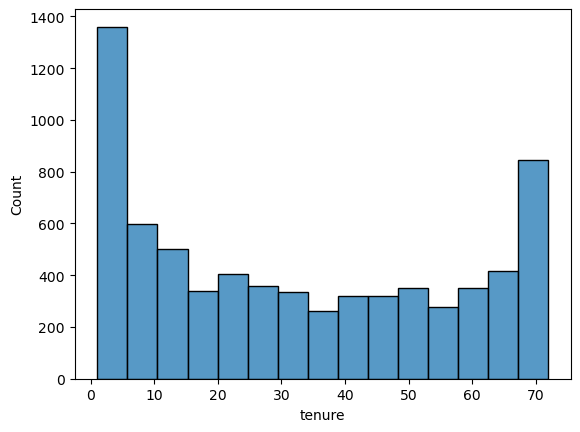

In [16]:
sns.histplot(data=df,x='tenure')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Contract', ylabel='Count'>

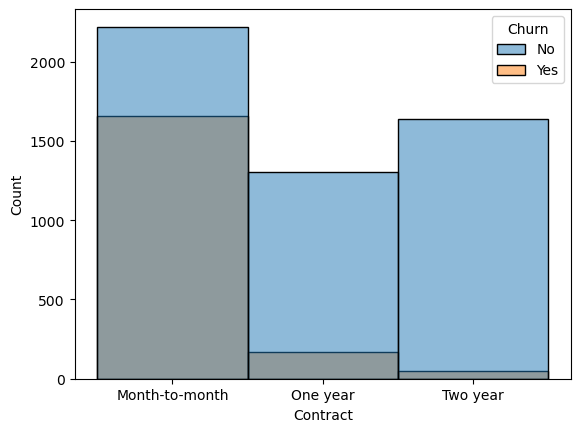

In [17]:
sns.histplot(data=df,x='Contract',hue='Churn')

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

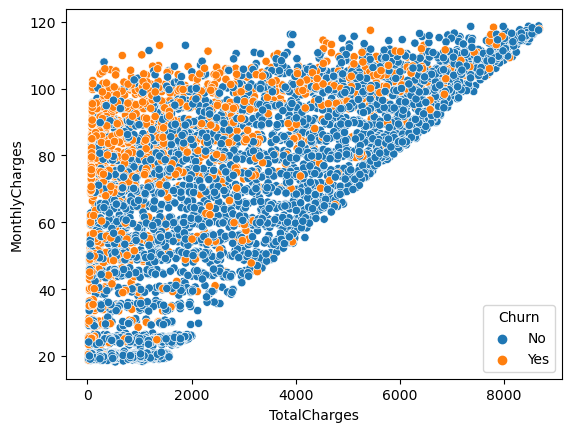

In [18]:
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',hue='Churn',data=df)

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

In [20]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

<Axes: xlabel='Churn', ylabel='tenure'>

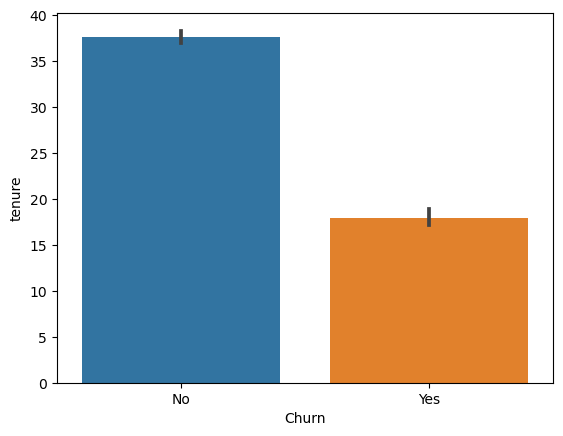

In [21]:
sns.barplot(x='Churn',y='tenure',data=df)

In [22]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']
percentage_churn=100*yes_churn/(yes_churn+no_churn)
percentage_churn.iloc[0]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [23]:
xyz=percentage_churn.transpose()['customerID']
xyz

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

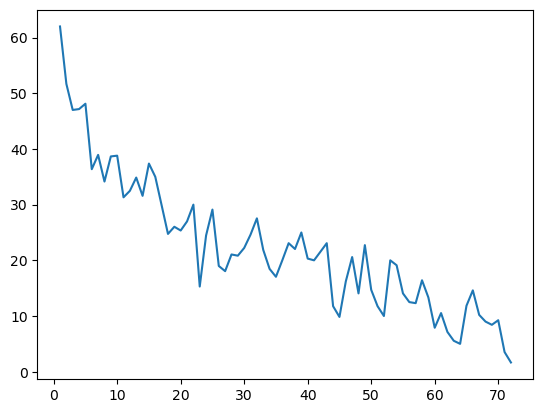

In [24]:
plt.plot(xyz.index,xyz.values)

In [25]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    if tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [26]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [27]:
df['Tenure Cohort']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

In [28]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

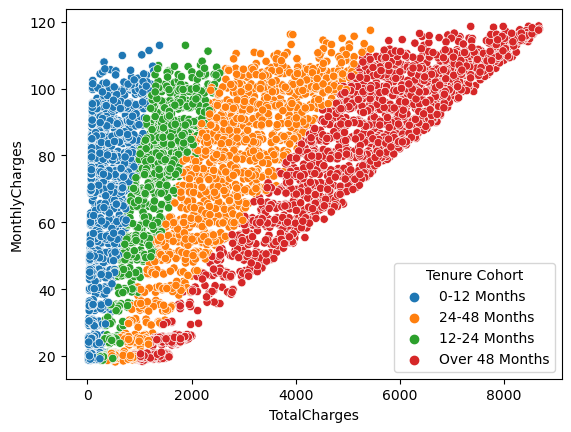

In [29]:
sns.scatterplot(data=df,x='TotalCharges',y='MonthlyCharges',hue='Tenure Cohort')

<Axes: xlabel='Churn', ylabel='count'>

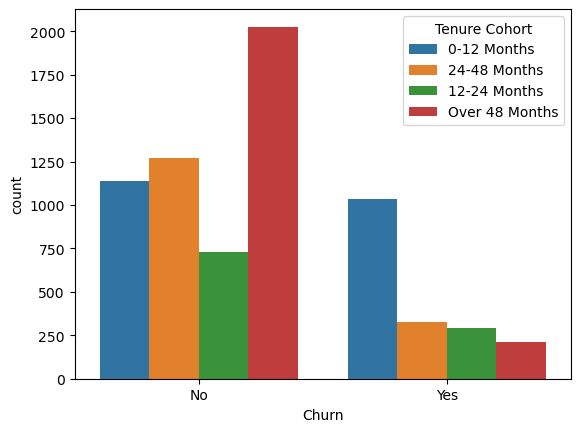

In [30]:
sns.countplot(x='Churn',data=df,hue='Tenure Cohort')

<Axes: xlabel='Contract', ylabel='count'>

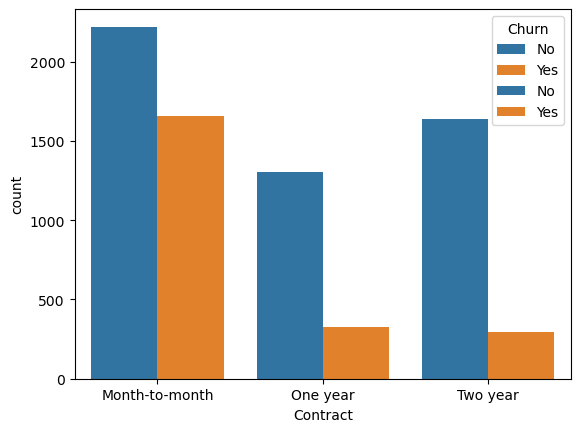

In [31]:
sns.countplot(x='Tenure Cohort',hue='Churn',data=df)
sns.countplot(x='Contract',hue='Churn',data=df)

-----

# Part 4: Predictive Modeling



In [32]:
pd.get_dummies(df)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,Tenure Cohort_0-12 Months,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
7028,0,72,103.20,7362.90,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
7029,0,11,29.60,346.45,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
7030,1,4,74.40,306.60,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False


In [33]:
X=df.drop(['customerID','Churn'],axis=1)
X=pd.get_dummies(X,drop_first=True)
X
y=df['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=101)

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[1,5,10],'criterion':['gini','log_loss','entropy']}
grid=GridSearchCV(model,param_grid)

In [37]:
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [38]:
from sklearn.metrics import classification_report
pred=grid.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [39]:
model.feature_importances_

array([0.01928944, 0.20252381, 0.19926845, 0.20149256, 0.02021671,
       0.02130749, 0.01327071, 0.0016918 , 0.00240879, 0.01749899,
       0.1086629 , 0.        , 0.        , 0.02063743, 0.0003527 ,
       0.01944288, 0.        , 0.01349849, 0.        , 0.01493174,
       0.        , 0.00735666, 0.00909601, 0.00821614, 0.01492175,
       0.01102676, 0.02123595, 0.01046165, 0.0218178 , 0.01497082,
       0.00256255, 0.        , 0.00183899])

In [40]:
importance=pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Feature Importance'])
imp=importance[importance['Feature Importance']>0]
imp

,Feature Importance
SeniorCitizen,0.019289
tenure,0.202524
MonthlyCharges,0.199268
TotalCharges,0.201493
gender_Male,0.020217
Partner_Yes,0.021307
Dependents_Yes,0.013271
PhoneService_Yes,0.001692
MultipleLines_No phone service,0.002409
MultipleLines_Yes,0.017499


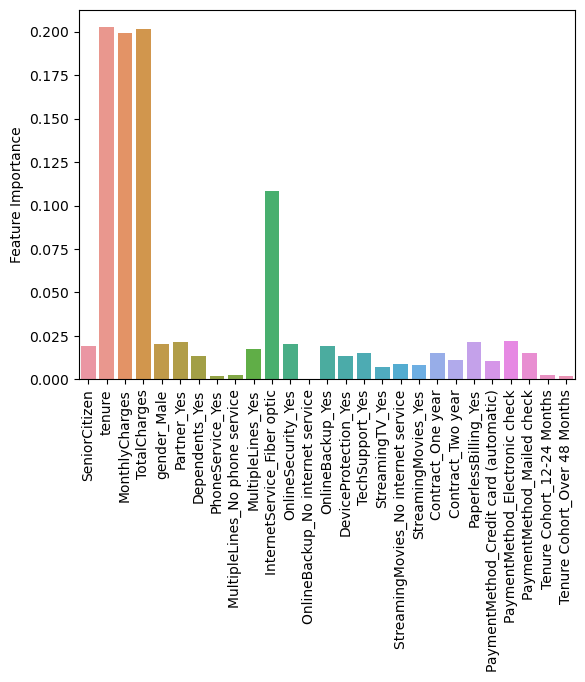

In [41]:
sns.barplot(data=imp,y='Feature Importance',x=imp.index)
plt.xticks(rotation=90);

## Random Forest



In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.49      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.78       704



## Boosted Trees

In [44]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [45]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.